# 回归分析、过拟合、分类、梯度下降、随机梯度下降

链接： http://mp.weixin.qq.com/s/t8ePU3PZi-h2ufTOp6k43g

线性回归

1.解析法求回归参数

In [6]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [9]:
#数据集
x = 2*np.random.rand(100,1)
y = 4+3*np.random.rand(100,1)

In [10]:
# X每个元素加1
#.dot()矩阵相乘
x_b = np.c_[np.ones((100,1)),x]
theta_best = np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)#解析解

In [19]:
# 训练
lin_reg = LinearRegression()
lin_reg.fit(x, y)
print(lin_reg.intercept_, lin_reg.coef_)

[ 5.45318732] [[ 0.1152536]]


In [20]:
# 测试数据
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 5.45318732]
 [ 5.68369453]]


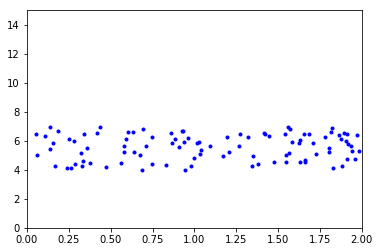

In [29]:
# 画图
plt.plot(X_new, y_predict,"r-")
plt.plot(x, y,"b.")
plt.axis([0,2,0,15])
plt.show()

Batch Gradient Descent

In [31]:
# BGD梯度下降
eta = 0.1
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)

In [38]:
for iteration in range(n_iterations):
    gradients = 2/m*x_b.T.dot(x_b.dot(theta)-y)
    theta = theta-eta*gradients
print(theta) #求得的系数结果和用解析解算出来的相似

[[ 5.45318732]
 [ 0.1152536 ]]


Stochastic Gradient Descent

In [43]:
#可以避免局部最优结果，但是会震来震去。为了防止这种震荡，让学习速率η不断减小（类似模拟退火）
# SGD梯度下降
m = 100
n_epochs =50 
t0,t1 = 5,50#η初始值0.1
def learning_schedule(t):
    return t0/(t+t1)

In [47]:
theta = np.random.randn(2,1) #random initialization
for epoch in range(n_epochs):
    for i in range(m):
        print("========")
        print(i)
        random_index = np.random.randint(m)
        print("random_index:",random_index)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        print("xi,yi :",xi,yi)
        gradients = 2*xi.T.dot(xi.dot(theta)-yi)
        print("gradients",gradients)
        eta = learning_schedule(epoch*m+i)
        print( "eta",eta)
        theta = theta  -eta*gradients
        print("theta:",theta)
print(theta)

0
random_index: 52
xi,yi : [[ 1.          0.57863076]] [[ 5.2262811]]
gradients [[-9.79013104]
 [-5.66487101]]
eta 0.1
theta: [[ 1.28507444]
 [ 0.60995912]]
1
random_index: 32
xi,yi : [[ 1.       0.32187]] [[ 5.19389074]]
gradients [[-7.42497753]
 [-2.38987751]]
eta 0.09803921568627451
theta: [[ 2.01301341]
 [ 0.84426083]]
2
random_index: 27
xi,yi : [[ 1.          1.81907485]] [[ 6.58121038]]
gradients [[ -6.06484665]
 [-11.03240998]]
eta 0.09615384615384616
theta: [[ 2.59617174]
 [ 1.90506949]]
3
random_index: 61
xi,yi : [[ 1.          1.94279123]] [[ 5.31169874]]
gradients [[ 1.97125059]
 [ 3.82972837]]
eta 0.09433962264150944
theta: [[ 2.4102047 ]
 [ 1.54377436]]
4
random_index: 54
xi,yi : [[ 1.         1.5803506]] [[ 5.94840607]]
gradients [[-2.19699327]
 [-3.47201963]]
eta 0.09259259259259259
theta: [[ 2.61363001]
 [ 1.86525766]]
5
random_index: 45
xi,yi : [[ 1.          0.46981187]] [[ 4.18845462]]
gradients [[-1.39700884]
 [-0.65633134]]
eta 0.09090909090909091
theta: [[ 2.74063

xi,yi : [[ 1.          0.83188999]] [[ 4.30488287]]
gradients [[ 2.02907836]
 [ 1.68796998]]
eta 0.025
theta: [[ 4.77910689]
 [ 0.54632593]]
51
random_index: 89
xi,yi : [[ 1.          1.77823536]] [[ 6.26183909]]
gradients [[-1.02247223]
 [-1.81819627]]
eta 0.024875621890547265
theta: [[ 4.80454152]
 [ 0.59155469]]
52
random_index: 43
xi,yi : [[ 1.          1.90484028]] [[ 6.01868772]]
gradients [[-0.17465798]
 [-0.33269556]]
eta 0.024752475247524754
theta: [[ 4.80886474]
 [ 0.59978973]]
53
random_index: 38
xi,yi : [[ 1.          1.86441416]] [[ 6.36991696]]
gradients [[-0.88559151]
 [-1.65110935]]
eta 0.024630541871921183
theta: [[ 4.83067733]
 [ 0.64045745]]
54
random_index: 23
xi,yi : [[ 1.          1.26493382]] [[ 5.65058589]]
gradients [[-0.01954452]
 [-0.02472253]]
eta 0.024509803921568627
theta: [[ 4.83115637]
 [ 0.6410634 ]]
55
random_index: 39
xi,yi : [[ 1.          1.72411132]] [[ 5.06347432]]
gradients [[ 1.7458934 ]
 [ 3.01011457]]
eta 0.024390243902439025
theta: [[ 4.78857

random_index: 92
xi,yi : [[ 1.          1.90912561]] [[ 4.76883638]]
gradients [[ 2.47777886]
 [ 4.73039107]]
eta 0.015822784810126583
theta: [[ 5.07610651]
 [ 0.39259846]]
67
random_index: 19
xi,yi : [[ 1.          1.62283445]] [[ 5.83985097]]
gradients [[-0.25324429]
 [-0.41097357]]
eta 0.015772870662460567
theta: [[ 5.08010089]
 [ 0.3990807 ]]
68
random_index: 62
xi,yi : [[ 1.          1.63086504]] [[ 4.53728]]
gradients [[ 2.3873353 ]
 [ 3.89342168]]
eta 0.015723270440251572
theta: [[ 5.04256418]
 [ 0.33786337]]
69
random_index: 74
xi,yi : [[ 1.          0.69463002]] [[ 6.79538556]]
gradients [[-3.03626268]
 [-2.10907921]]
eta 0.01567398119122257
theta: [[ 5.0901545 ]
 [ 0.37092104]]
70
random_index: 36
xi,yi : [[ 1.         1.8217327]] [[ 6.91913231]]
gradients [[-2.30651765]
 [-4.20185861]]
eta 0.015625
theta: [[ 5.12619384]
 [ 0.43657508]]
71
random_index: 10
xi,yi : [[ 1.          0.83188999]] [[ 4.30488287]]
gradients [[ 2.36898682]
 [ 1.97073643]]
eta 0.01557632398753894
thet

random_index: 29
xi,yi : [[ 1.         0.9963912]] [[ 4.80313726]]
gradients [[ 1.7620844 ]
 [ 1.75572539]]
eta 0.01141552511415525
theta: [[ 5.39400733]
 [ 0.2509926 ]]
89
random_index: 78
xi,yi : [[ 1.          1.93665517]] [[ 5.62789588]]
gradients [[ 0.50439512]
 [ 0.97683942]]
eta 0.011389521640091117
theta: [[ 5.38826251]
 [ 0.23986686]]
90
random_index: 32
xi,yi : [[ 1.       0.32187]] [[ 5.19389074]]
gradients [[ 0.54315543]
 [ 0.17482544]]
eta 0.011363636363636364
theta: [[ 5.38209029]
 [ 0.23788021]]
91
random_index: 0
xi,yi : [[ 1.          0.59458659]] [[ 6.11160123]]
gradients [[-1.17614111]
 [-0.69931773]]
eta 0.011337868480725623
theta: [[ 5.39542522]
 [ 0.24580898]]
92
random_index: 53
xi,yi : [[ 1.          0.27944805]] [[ 5.97865609]]
gradients [[-1.02908006]
 [-0.28757442]]
eta 0.011312217194570135
theta: [[ 5.4070664 ]
 [ 0.24906209]]
93
random_index: 16
xi,yi : [[ 1.         1.0321603]] [[ 5.10900032]]
gradients [[ 1.11027616]
 [ 1.14598297]]
eta 0.0112866817155756

4
random_index: 0
xi,yi : [[ 1.          0.59458659]] [[ 6.11160123]]
gradients [[-1.4362992 ]
 [-0.85400424]]
eta 0.009025270758122744
theta: [[ 5.37705443]
 [ 0.05708679]]
5
random_index: 93
xi,yi : [[ 1.          0.26167875]] [[ 4.11982597]]
gradients [[ 2.54433371]
 [ 0.66579806]]
eta 0.009009009009009009
theta: [[ 5.3541325 ]
 [ 0.05108861]]
6
random_index: 32
xi,yi : [[ 1.       0.32187]] [[ 5.19389074]]
gradients [[ 0.3533713 ]
 [ 0.11373962]]
eta 0.008992805755395683
theta: [[ 5.3509547 ]
 [ 0.05006578]]
7
random_index: 37
xi,yi : [[ 1.          1.38242383]] [[ 4.38360801]]
gradients [[ 2.07311763]
 [ 2.8659272 ]]
eta 0.008976660682226212
theta: [[ 5.33234503]
 [ 0.02433932]]
8
random_index: 12
xi,yi : [[ 1.          0.13977423]] [[ 5.40724748]]
gradients [[-0.14300088]
 [-0.01998784]]
eta 0.008960573476702509
theta: [[ 5.3336264 ]
 [ 0.02451842]]
9
random_index: 34
xi,yi : [[ 1.          0.67402458]] [[ 5.05565564]]
gradients [[ 0.58899355]
 [ 0.39699612]]
eta 0.00894454382826

xi,yi : [[ 1.          0.43910247]] [[ 6.96333892]]
gradients [[-2.9096043 ]
 [-1.27761444]]
eta 0.007451564828614009
theta: [[ 5.44411811]
 [ 0.20560148]]
22
random_index: 31
xi,yi : [[ 1.         0.4172663]] [[ 6.53359756]]
gradients [[-2.00737777]
 [-0.83761108]]
eta 0.00744047619047619
theta: [[ 5.45905396]
 [ 0.2118337 ]]
23
random_index: 68
xi,yi : [[ 1.          0.63870334]] [[ 5.21200858]]
gradients [[ 0.76468855]
 [ 0.48840913]]
eta 0.007429420505200594
theta: [[ 5.45337276]
 [ 0.20820511]]
24
random_index: 74
xi,yi : [[ 1.          0.69463002]] [[ 6.79538556]]
gradients [[-2.39477455]
 [-1.6634823 ]]
eta 0.00741839762611276
theta: [[ 5.47113815]
 [ 0.22054548]]
25
random_index: 15
xi,yi : [[ 1.          0.57837601]] [[ 5.66102375]]
gradients [[-0.12465476]
 [-0.07209732]]
eta 0.007407407407407408
theta: [[ 5.47206152]
 [ 0.22107954]]
26
random_index: 97
xi,yi : [[ 1.          1.57365947]] [[ 6.85008706]]
gradients [[-2.06024328]
 [-3.24212134]]
eta 0.0073964497041420114
theta

eta 0.0063532401524777635
theta: [[ 5.28409682]
 [ 0.11104518]]
38
random_index: 94
xi,yi : [[ 1.          1.66372896]] [[ 4.6833078]]
gradients [[ 1.57107622]
 [ 2.613845  ]]
eta 0.006345177664974619
theta: [[ 5.27412806]
 [ 0.09445987]]
39
random_index: 20
xi,yi : [[ 1.          1.68459071]] [[ 6.47292054]]
gradients [[-2.07933251]
 [-3.50282422]]
eta 0.0063371356147021544
theta: [[ 5.28730508]
 [ 0.11665774]]
40
random_index: 97
xi,yi : [[ 1.          1.57365947]] [[ 6.85008706]]
gradients [[-2.75840485]
 [-4.3407899 ]]
eta 0.006329113924050633
theta: [[ 5.30476334]
 [ 0.1441311 ]]
41
random_index: 27
xi,yi : [[ 1.          1.81907485]] [[ 6.58121038]]
gradients [[-2.02852358]
 [-3.69003622]]
eta 0.006321112515802781
theta: [[ 5.31758586]
 [ 0.16745623]]
42
random_index: 84
xi,yi : [[ 1.          1.96942943]] [[ 6.41543064]]
gradients [[-1.53610308]
 [-3.02524662]]
eta 0.006313131313131313
theta: [[ 5.32728348]
 [ 0.18655501]]
43
random_index: 73
xi,yi : [[ 1.          1.54013394]] 

random_index: 88
xi,yi : [[ 1.          1.41930859]] [[ 6.44239774]]
gradients [[-1.47522897]
 [-2.09380515]]
eta 0.005411255411255411
theta: [[ 5.41342745]
 [ 0.22223467]]
75
random_index: 7
xi,yi : [[ 1.          0.23923961]] [[ 4.09625149]]
gradients [[ 2.74068659]
 [ 0.65568078]]
eta 0.005405405405405406
theta: [[ 5.39861293]
 [ 0.21869045]]
76
random_index: 73
xi,yi : [[ 1.          1.54013394]] [[ 6.48157255]]
gradients [[-1.49229408]
 [-2.29833277]]
eta 0.005399568034557235
theta: [[ 5.40667067]
 [ 0.23110045]]
77
random_index: 30
xi,yi : [[ 1.          1.98251297]] [[ 5.31018152]]
gradients [[ 1.1092976 ]
 [ 2.19919687]]
eta 0.005393743257820928
theta: [[ 5.40068741]
 [ 0.21923855]]
78
random_index: 48
xi,yi : [[ 1.          1.65476863]] [[ 6.44099042]]
gradients [[-1.35502788]
 [-2.24225762]]
eta 0.005387931034482759
theta: [[ 5.4079882 ]
 [ 0.23131968]]
79
random_index: 60
xi,yi : [[ 1.          1.34564136]] [[ 4.27367472]]
gradients [[ 2.89117361]
 [ 3.89048278]]
eta 0.00538

 [ 3.47251911]]
eta 0.004748338081671415
theta: [[ 5.38685483]
 [ 0.10917448]]
4
random_index: 61
xi,yi : [[ 1.          1.94279123]] [[ 5.31169874]]
gradients [[ 0.57451864]
 [ 1.11616978]]
eta 0.004743833017077799
theta: [[ 5.38412941]
 [ 0.10387956]]
5
random_index: 95
xi,yi : [[ 1.          1.02484408]] [[ 5.89762452]]
gradients [[-0.81406951]
 [-0.83429432]]
eta 0.004739336492890996
theta: [[ 5.38798756]
 [ 0.10783356]]
6
random_index: 80
xi,yi : [[ 1.          1.03903852]] [[ 5.35458297]]
gradients [[ 0.29089563]
 [ 0.30225176]]
eta 0.004734848484848485
theta: [[ 5.38661022]
 [ 0.10640245]]
7
random_index: 87
xi,yi : [[ 1.          0.68439766]] [[ 4.01395739]]
gradients [[ 2.89094882]
 [ 1.9785586 ]]
eta 0.004730368968779565
theta: [[ 5.37293496]
 [ 0.09704313]]
8
random_index: 31
xi,yi : [[ 1.         0.4172663]] [[ 6.53359756]]
gradients [[-2.24033954]
 [-0.93481818]]
eta 0.004725897920604915
theta: [[ 5.38352258]
 [ 0.10146099]]
9
random_index: 41
xi,yi : [[ 1.          1.7078

theta: [[ 5.45558221]
 [ 0.12174486]]
26
random_index: 52
xi,yi : [[ 1.          0.57863076]] [[ 5.2262811]]
gradients [[ 0.59949286]
 [ 0.34688501]]
eta 0.004251700680272109
theta: [[ 5.45303334]
 [ 0.12027001]]
27
random_index: 60
xi,yi : [[ 1.          1.34564136]] [[ 4.27367472]]
gradients [[ 2.68239784]
 [ 3.60954547]]
eta 0.004248088360237893
theta: [[ 5.44163828]
 [ 0.10493634]]
28
random_index: 30
xi,yi : [[ 1.          1.98251297]] [[ 5.31018152]]
gradients [[ 0.67898885]
 [ 1.34610419]]
eta 0.004244482173174873
theta: [[ 5.43875633]
 [ 0.09922283]]
29
random_index: 66
xi,yi : [[ 1.          0.28731129]] [[ 4.43162322]]
gradients [[ 2.0712819 ]
 [ 0.59510268]]
eta 0.004240882103477523
theta: [[ 5.42997226]
 [ 0.09669907]]
30
random_index: 81
xi,yi : [[ 1.          1.89322155]] [[ 6.521407]]
gradients [[-1.81672396]
 [-3.43946096]]
eta 0.00423728813559322
theta: [[ 5.43767025]
 [ 0.11127305]]
31
random_index: 4
xi,yi : [[ 1.          0.86534519]] [[ 5.85892715]]
gradients [[-0.

xi,yi : [[ 1.          0.57837601]] [[ 5.66102375]]
gradients [[-0.30546165]
 [-0.17667169]]
eta 0.0037821482602118004
theta: [[ 5.45090571]
 [ 0.10188699]]
73
random_index: 8
xi,yi : [[ 1.          0.93248874]] [[ 6.6855595]]
gradients [[-2.27929065]
 [-2.12541288]]
eta 0.003779289493575208
theta: [[ 5.45951981]
 [ 0.10991954]]
74
random_index: 61
xi,yi : [[ 1.          1.94279123]] [[ 5.31169874]]
gradients [[ 0.72274357]
 [ 1.40413987]]
eta 0.0037764350453172208
theta: [[ 5.45679041]
 [ 0.1046169 ]]
75
random_index: 76
xi,yi : [[ 1.          0.33944799]] [[ 6.47435369]]
gradients [[-1.96410257]
 [-0.66671066]]
eta 0.0037735849056603774
theta: [[ 5.46420212]
 [ 0.10713279]]
76
random_index: 16
xi,yi : [[ 1.         1.0321603]] [[ 5.10900032]]
gradients [[ 0.93156002]
 [ 0.96151927]]
eta 0.003770739064856712
theta: [[ 5.46068945]
 [ 0.10350715]]
77
random_index: 16
xi,yi : [[ 1.         1.0321603]] [[ 5.10900032]]
gradients [[ 0.9170502 ]
 [ 0.94654281]]
eta 0.0037678975131876413
thet

eta 0.0034940600978336828
theta: [[ 5.48320074]
 [ 0.08287709]]
82
random_index: 44
xi,yi : [[ 1.          0.05502822]] [[ 6.48239877]]
gradients [[-1.9892749 ]
 [-0.10946625]]
eta 0.0034916201117318434
theta: [[ 5.49014653]
 [ 0.0832593 ]]
83
random_index: 73
xi,yi : [[ 1.          1.54013394]] [[ 6.48157255]]
gradients [[-1.72639109]
 [-2.65887352]]
eta 0.0034891835310537334
theta: [[ 5.49617023]
 [ 0.0925366 ]]
84
random_index: 4
xi,yi : [[ 1.          0.86534519]] [[ 5.85892715]]
gradients [[-0.56536164]
 [-0.48923298]]
eta 0.003486750348675035
theta: [[ 5.4981415 ]
 [ 0.09424243]]
85
random_index: 99
xi,yi : [[ 1.          0.36138947]] [[ 5.47961025]]
gradients [[ 0.10517896]
 [ 0.03801057]]
eta 0.003484320557491289
theta: [[ 5.49777502]
 [ 0.09410999]]
86
random_index: 34
xi,yi : [[ 1.          0.67402458]] [[ 5.05565564]]
gradients [[ 1.01110366]
 [ 0.68150871]]
eta 0.003481894150417827
theta: [[ 5.49425447]
 [ 0.09173705]]
87
random_index: 61
xi,yi : [[ 1.          1.94279123]]

xi,yi : [[ 1.          0.90929712]] [[ 5.5736409]]
gradients [[-0.04939529]
 [-0.04491499]]
eta 0.0032808398950131233
theta: [[ 5.46588843]
 [ 0.09166517]]
75
random_index: 92
xi,yi : [[ 1.          1.90912561]] [[ 4.76883638]]
gradients [[ 1.74410477]
 [ 3.32971507]]
eta 0.003278688524590164
theta: [[ 5.46017005]
 [ 0.08074807]]
76
random_index: 77
xi,yi : [[ 1.          0.86130268]] [[ 6.50559669]]
gradients [[-1.95175621]
 [-1.68105286]]
eta 0.00327653997378768
theta: [[ 5.46656506]
 [ 0.08625611]]
77
random_index: 19
xi,yi : [[ 1.          1.62283445]] [[ 5.83985097]]
gradients [[-0.46661303]
 [-0.75723571]]
eta 0.0032743942370661427
theta: [[ 5.46809294]
 [ 0.0887356 ]]
78
random_index: 97
xi,yi : [[ 1.          1.57365947]] [[ 6.85008706]]
gradients [[-2.48470903]
 [-3.91008588]]
eta 0.0032722513089005235
theta: [[ 5.47622353]
 [ 0.10153038]]
79
random_index: 10
xi,yi : [[ 1.          0.83188999]] [[ 4.30488287]]
gradients [[ 2.51160553]
 [ 2.08937951]]
eta 0.0032701111837802484


16
random_index: 11
xi,yi : [[ 1.          0.37391485]] [[ 4.47001666]]
gradients [[ 2.12132257]
 [ 0.793194  ]]
eta 0.003001200480192077
theta: [[ 5.49451335]
 [ 0.07731161]]
17
random_index: 10
xi,yi : [[ 1.          0.83188999]] [[ 4.30488287]]
gradients [[ 2.50789047]
 [ 2.08628898]]
eta 0.002999400119976005
theta: [[ 5.48699119]
 [ 0.07105399]]
18
random_index: 18
xi,yi : [[ 1.          1.87760473]] [[ 6.15266722]]
gradients [[-1.06452945]
 [-1.99876552]]
eta 0.002997601918465228
theta: [[ 5.49018222]
 [ 0.0770455 ]]
19
random_index: 62
xi,yi : [[ 1.          1.63086504]] [[ 4.53728]]
gradients [[ 2.15710606]
 [ 3.51794886]]
eta 0.0029958058717795086
theta: [[ 5.48371995]
 [ 0.0665064 ]]
20
random_index: 66
xi,yi : [[ 1.          0.28731129]] [[ 4.43162322]]
gradients [[ 2.14240955]
 [ 0.61553846]]
eta 0.0029940119760479044
theta: [[ 5.47730555]
 [ 0.06466347]]
21
random_index: 88
xi,yi : [[ 1.          1.41930859]] [[ 6.44239774]]
gradients [[-1.74662953]
 [-2.47900629]]
eta 0.00

 [ 0.93431583]]
eta 0.0028137310073157004
theta: [[ 5.47645309]
 [ 0.07739967]]
28
random_index: 10
xi,yi : [[ 1.          0.83188999]] [[ 4.30488287]]
gradients [[ 2.47191645]
 [ 2.05636256]]
eta 0.00281214848143982
theta: [[ 5.46950169]
 [ 0.07161688]]
29
random_index: 62
xi,yi : [[ 1.          1.63086504]] [[ 4.53728]]
gradients [[ 2.0980383 ]
 [ 3.42161731]]
eta 0.002810567734682406
theta: [[ 5.46360501]
 [ 0.06200019]]
30
random_index: 74
xi,yi : [[ 1.          0.69463002]] [[ 6.79538556]]
gradients [[-2.57742671]
 [-1.79035797]]
eta 0.0028089887640449437
theta: [[ 5.47084497]
 [ 0.06702928]]
31
random_index: 88
xi,yi : [[ 1.          1.41930859]] [[ 6.44239774]]
gradients [[-1.75283506]
 [-2.48781386]]
eta 0.002807411566535654
theta: [[ 5.4757659]
 [ 0.0740136]]
32
random_index: 58
xi,yi : [[ 1.          0.74898405]] [[ 4.41758423]]
gradients [[ 2.22723337]
 [ 1.66816227]]
eta 0.0028058361391694723
theta: [[ 5.46951665]
 [ 0.06933301]]
33
random_index: 98
xi,yi : [[ 1.          0

theta: [[ 5.4669894 ]
 [ 0.06277293]]
47
random_index: 87
xi,yi : [[ 1.          0.68439766]] [[ 4.01395739]]
gradients [[ 2.99198733]
 [ 2.04770912]]
eta 0.002635740643120717
theta: [[ 5.4591033]
 [ 0.0573757]]
48
random_index: 45
xi,yi : [[ 1.          0.46981187]] [[ 4.18845462]]
gradients [[ 2.59520894]
 [ 1.21925996]]
eta 0.0026343519494204425
theta: [[ 5.4522666 ]
 [ 0.05416374]]
49
random_index: 2
xi,yi : [[ 1.          0.33294672]] [[ 4.63192635]]
gradients [[ 1.6767478 ]
 [ 0.55826767]]
eta 0.0026329647182727752
theta: [[ 5.44785179]
 [ 0.05269385]]
50
random_index: 13
xi,yi : [[ 1.         1.5453027]] [[ 4.5102281]]
gradients [[ 2.03810326]
 [ 3.14948646]]
eta 0.002631578947368421
theta: [[ 5.44248836]
 [ 0.04440572]]
51
random_index: 51
xi,yi : [[ 1.          1.27549395]] [[ 6.49717244]]
gradients [[-1.99608971]
 [-2.54600035]]
eta 0.0026301946344029457
theta: [[ 5.44773846]
 [ 0.0511022 ]]
52
random_index: 0
xi,yi : [[ 1.          0.59458659]] [[ 6.11160123]]
gradients [[-1

xi,yi : [[ 1.         1.8217327]] [[ 6.91913231]]
gradients [[-2.4590421 ]
 [-4.47971739]]
eta 0.00249500998003992
theta: [[ 5.52583753]
 [ 0.10444478]]
55
random_index: 71
xi,yi : [[ 1.          1.91426221]] [[ 6.45954146]]
gradients [[-1.46753849]
 [-2.80925347]]
eta 0.0024937655860349127
theta: [[ 5.52949723]
 [ 0.1114504 ]]
56
random_index: 98
xi,yi : [[ 1.          0.32828472]] [[ 4.25483942]]
gradients [[ 2.62249054]
 [ 0.86092358]]
eta 0.0024925224327018943
theta: [[ 5.52296061]
 [ 0.10930452]]
57
random_index: 70
xi,yi : [[ 1.          1.44339232]] [[ 6.30257537]]
gradients [[-1.2436909 ]
 [-1.79513389]]
eta 0.002491280518186348
theta: [[ 5.526059  ]
 [ 0.11377671]]
58
random_index: 63
xi,yi : [[ 1.         1.4174325]] [[ 6.56599887]]
gradients [[-1.75733814]
 [-2.49090819]]
eta 0.00249003984063745
theta: [[ 5.53043484]
 [ 0.11997917]]
59
random_index: 7
xi,yi : [[ 1.          0.23923961]] [[ 4.09625149]]
gradients [[ 2.92577423]
 [ 0.69996107]]
eta 0.0024888003982080635
theta:

80
random_index: 23
xi,yi : [[ 1.          1.26493382]] [[ 5.65058589]]
gradients [[-0.19143115]
 [-0.24214773]]
eta 0.002347417840375587
theta: [[ 5.45467045]
 [ 0.0801372 ]]
81
random_index: 70
xi,yi : [[ 1.          1.44339232]] [[ 6.30257537]]
gradients [[-1.46447102]
 [-2.11380622]]
eta 0.002346316283435007
theta: [[ 5.45810656]
 [ 0.08509685]]
82
random_index: 33
xi,yi : [[ 1.          1.47712678]] [[ 4.53419763]]
gradients [[ 2.09921554]
 [ 3.10080749]]
eta 0.0023452157598499064
theta: [[ 5.45318345]
 [ 0.07782479]]
83
random_index: 24
xi,yi : [[ 1.         1.1975914]] [[ 6.24035811]]
gradients [[-1.38794472]
 [-1.66219066]]
eta 0.0023441162681669013
theta: [[ 5.45643695]
 [ 0.08172116]]
84
random_index: 43
xi,yi : [[ 1.          1.90484028]] [[ 6.01868772]]
gradients [[-0.81317002]
 [-1.54895901]]
eta 0.0023430178069353325
theta: [[ 5.45834222]
 [ 0.0853504 ]]
85
random_index: 23
xi,yi : [[ 1.          1.26493382]] [[ 5.65058589]]
gradients [[-0.16856212]
 [-0.21321992]]
eta 0.

gradients [[-0.96700123]
 [-1.81564609]]
eta 0.002226179875333927
theta: [[ 5.45949529]
 [ 0.11685805]]
97
random_index: 25
xi,yi : [[ 1.          0.43910247]] [[ 6.96333892]]
gradients [[-2.90506195]
 [-1.27561988]]
eta 0.0022251891410769915
theta: [[ 5.4659596 ]
 [ 0.11969655]]
98
random_index: 77
xi,yi : [[ 1.          0.86130268]] [[ 6.50559669]]
gradients [[-1.87308427]
 [-1.6132925 ]]
eta 0.002224199288256228
theta: [[ 5.47012571]
 [ 0.12328483]]
99
random_index: 7
xi,yi : [[ 1.          0.23923961]] [[ 4.09625149]]
gradients [[ 2.80673767]
 [ 0.67148281]]
eta 0.0022232103156958646
theta: [[ 5.46388574]
 [ 0.12179198]]
0
random_index: 92
xi,yi : [[ 1.          1.90912561]] [[ 4.76883638]]
gradients [[ 1.85513113]
 [ 3.54167835]]
eta 0.0022222222222222222
theta: [[ 5.45976323]
 [ 0.11392159]]
1
random_index: 37
xi,yi : [[ 1.          1.38242383]] [[ 4.38360801]]
gradients [[ 2.46728628]
 [ 3.41083534]]
eta 0.002221235006663705
theta: [[ 5.45428281]
 [ 0.10634532]]
2
random_index: 

gradients [[ 1.32837945]
 [ 1.55909515]]
eta 0.0021123785382340513
theta: [[ 5.45998741]
 [ 0.13492323]]
18
random_index: 56
xi,yi : [[ 1.          1.34930381]] [[ 4.96532254]]
gradients [[ 1.35343461]
 [ 1.82619447]]
eta 0.0021114864864864866
theta: [[ 5.45712965]
 [ 0.13106725]]
19
random_index: 74
xi,yi : [[ 1.          0.69463002]] [[ 6.79538556]]
gradients [[-2.49442533]
 [-1.73270272]]
eta 0.002110595187842972
theta: [[ 5.46239437]
 [ 0.13472428]]
20
random_index: 38
xi,yi : [[ 1.          1.86441416]] [[ 6.36991696]]
gradients [[-1.31268146]
 [-2.4473819 ]]
eta 0.002109704641350211
theta: [[ 5.46516374]
 [ 0.13988754]]
21
random_index: 86
xi,yi : [[ 1.          1.56129756]] [[ 6.98165555]]
gradients [[-2.59617148]
 [-4.05339619]]
eta 0.002108814846056516
theta: [[ 5.47063859]
 [ 0.1484354 ]]
22
random_index: 17
xi,yi : [[ 1.          1.88292742]] [[ 4.27619615]]
gradients [[ 2.94787104]
 [ 5.55062722]]
eta 0.0021079258010118043
theta: [[ 5.46442469]
 [ 0.13673509]]
23
random_ind

gradients [[-1.39145327]
 [-2.00841297]]
eta 0.001988862370723946
theta: [[ 5.44469385]
 [ 0.11825466]]
65
random_index: 9
xi,yi : [[ 1.          0.56457815]] [[ 4.4565358]]
gradients [[ 2.1098441 ]
 [ 1.19117188]]
eta 0.0019880715705765406
theta: [[ 5.44049933]
 [ 0.11588652]]
66
random_index: 58
xi,yi : [[ 1.          0.74898405]] [[ 4.41758423]]
gradients [[ 2.21942452]
 [ 1.66231356]]
eta 0.001987281399046105
theta: [[ 5.43608871]
 [ 0.11258304]]
67
random_index: 71
xi,yi : [[ 1.          1.91426221]] [[ 6.45954146]]
gradients [[-1.6158786 ]
 [-3.09321535]]
eta 0.001986491855383393
theta: [[ 5.43929864]
 [ 0.11872769]]
68
random_index: 73
xi,yi : [[ 1.          1.54013394]] [[ 6.48157255]]
gradients [[-1.71883476]
 [-2.64723575]]
eta 0.0019857029388403494
theta: [[ 5.44271173]
 [ 0.12398431]]
69
random_index: 75
xi,yi : [[ 1.          0.18683895]] [[ 6.64743878]]
gradients [[-2.36312389]
 [-0.44152358]]
eta 0.001984914648670107
theta: [[ 5.44740233]
 [ 0.1248607 ]]
70
random_index:

eta 0.0019004180919802356
theta: [[ 5.44901988]
 [ 0.12837249]]
82
random_index: 47
xi,yi : [[ 1.          1.56458504]] [[ 5.1870099]]
gradients [[ 0.92571931]
 [ 1.44836659]]
eta 0.001899696048632219
theta: [[ 5.4472613 ]
 [ 0.12562103]]
83
random_index: 77
xi,yi : [[ 1.          0.86130268]] [[ 6.50559669]]
gradients [[-1.90027533]
 [-1.63671223]]
eta 0.0018989745537409798
theta: [[ 5.45086987]
 [ 0.12872911]]
84
random_index: 32
xi,yi : [[ 1.       0.32187]] [[ 5.19389074]]
gradients [[ 0.59682633]
 [ 0.19210049]]
eta 0.0018982536066818527
theta: [[ 5.44973694]
 [ 0.12836445]]
85
random_index: 63
xi,yi : [[ 1.         1.4174325]] [[ 6.56599887]]
gradients [[-1.86862796]
 [-2.64865399]]
eta 0.0018975332068311196
theta: [[ 5.45328273]
 [ 0.13339036]]
86
random_index: 53
xi,yi : [[ 1.          0.27944805]] [[ 5.97865609]]
gradients [[-0.97619538]
 [-0.2727959 ]]
eta 0.0018968133535660092
theta: [[ 5.45513439]
 [ 0.1339078 ]]
87
random_index: 1
xi,yi : [[ 1.          1.91965707]] [[ 5.7

eta 0.0018201674554058974
theta: [[ 5.43207518]
 [ 0.12936449]]
98
random_index: 53
xi,yi : [[ 1.          0.27944805]] [[ 5.97865609]]
gradients [[-1.02086052]
 [-0.28527748]]
eta 0.001819505094614265
theta: [[ 5.43393264]
 [ 0.12988355]]
99
random_index: 54
xi,yi : [[ 1.         1.5803506]] [[ 5.94840607]]
gradients [[-0.61842376]
 [-0.97732636]]
eta 0.0018188432157148053
theta: [[ 5.43505746]
 [ 0.13166116]]
0
random_index: 67
xi,yi : [[ 1.          0.94476291]] [[ 4.00343296]]
gradients [[ 3.11202615]
 [ 2.94012688]]
eta 0.0018181818181818182
theta: [[ 5.42939923]
 [ 0.12631547]]
1
random_index: 82
xi,yi : [[ 1.          0.71153425]] [[ 5.62200765]]
gradients [[-0.20546128]
 [-0.14619274]]
eta 0.0018175209014903672
theta: [[ 5.42977266]
 [ 0.12658118]]
2
random_index: 11
xi,yi : [[ 1.          0.37391485]] [[ 4.47001666]]
gradients [[ 2.01417316]
 [ 0.75312925]]
eta 0.001816860465116279
theta: [[ 5.42611319]
 [ 0.12521285]]
3
random_index: 19
xi,yi : [[ 1.          1.62283445]] [[ 

theta: [[ 5.40217188]
 [ 0.12259013]]
31
random_index: 58
xi,yi : [[ 1.          0.74898405]] [[ 4.41758423]]
gradients [[ 2.15281142]
 [ 1.61242141]]
eta 0.0017355085039916696
theta: [[ 5.39843566]
 [ 0.11979176]]
32
random_index: 99
xi,yi : [[ 1.          0.36138947]] [[ 5.47961025]]
gradients [[-0.07576621]
 [-0.02738111]]
eta 0.0017349063150589867
theta: [[ 5.3985671 ]
 [ 0.11983927]]
33
random_index: 77
xi,yi : [[ 1.          0.86130268]] [[ 6.50559669]]
gradients [[-2.00762341]
 [-1.72917143]]
eta 0.001734304543877905
theta: [[ 5.40204894]
 [ 0.12283818]]
34
random_index: 91
xi,yi : [[ 1.         0.1661855]] [[ 4.27514872]]
gradients [[ 2.29462827]
 [ 0.38133394]]
eta 0.0017337031900138697
theta: [[ 5.39807073]
 [ 0.12217706]]
35
random_index: 10
xi,yi : [[ 1.          0.83188999]] [[ 4.30488287]]
gradients [[ 2.38965146]
 [ 1.98792713]]
eta 0.0017331022530329288
theta: [[ 5.39392922]
 [ 0.11873178]]
36
random_index: 47
xi,yi : [[ 1.          1.56458504]] [[ 5.1870099]]
gradients

eta 0.0016638935108153079
theta: [[ 5.39854127]
 [ 0.12006525]]
56
random_index: 8
xi,yi : [[ 1.          0.93248874]] [[ 6.6855595]]
gradients [[-2.35011748]
 [-2.19145809]]
eta 0.00166333998669328
theta: [[ 5.40245032]
 [ 0.12371039]]
57
random_index: 87
xi,yi : [[ 1.          0.68439766]] [[ 4.01395739]]
gradients [[ 2.94632006]
 [ 2.01645455]]
eta 0.0016627868307283007
theta: [[ 5.39755122]
 [ 0.12035745]]
58
random_index: 15
xi,yi : [[ 1.          0.57837601]] [[ 5.66102375]]
gradients [[-0.38772134]
 [-0.22424872]]
eta 0.0016622340425531915
theta: [[ 5.3981957 ]
 [ 0.12073021]]
59
random_index: 22
xi,yi : [[ 1.          1.96006309]] [[ 4.74752144]]
gradients [[ 1.77462617]
 [ 3.47837925]]
eta 0.001661681621801263
theta: [[ 5.39524684]
 [ 0.11495025]]
60
random_index: 59
xi,yi : [[ 1.          0.97808946]] [[ 4.28452577]]
gradients [[ 2.44630539]
 [ 2.39270551]]
eta 0.0016611295681063123
theta: [[ 5.39118321]
 [ 0.11097565]]
61
random_index: 10
xi,yi : [[ 1.          0.83188999]] 

gradients [[-0.10831895]
 [-0.1370163 ]]
eta 0.0016
theta: [[ 5.40622287]
 [ 0.15072264]]
76
random_index: 46
xi,yi : [[ 1.          0.15443992]] [[ 5.86285743]]
gradients [[-0.86671394]
 [-0.13385524]]
eta 0.001599488163787588
theta: [[ 5.40760917]
 [ 0.15093674]]
77
random_index: 38
xi,yi : [[ 1.          1.86441416]] [[ 6.36991696]]
gradients [[-1.36179841]
 [-2.53895623]]
eta 0.0015989766549408379
theta: [[ 5.40978665]
 [ 0.15499647]]
78
random_index: 83
xi,yi : [[ 1.          1.32299904]] [[ 6.27108502]]
gradients [[-1.31247638]
 [-1.736405  ]]
eta 0.00159846547314578
theta: [[ 5.4118846 ]
 [ 0.15777205]]
79
random_index: 12
xi,yi : [[ 1.          0.13977423]] [[ 5.40724748]]
gradients [[ 0.05337917]
 [ 0.00746103]]
eta 0.0015979546180888463
theta: [[ 5.4117993 ]
 [ 0.15776013]]
80
random_index: 81
xi,yi : [[ 1.          1.89322155]] [[ 6.521407]]
gradients [[-1.62186565]
 [-3.07055099]]
eta 0.001597444089456869
theta: [[ 5.41439014]
 [ 0.16266516]]
81
random_index: 87
xi,yi : [[ 

 [ 0.16971521]]
87
random_index: 37
xi,yi : [[ 1.          1.38242383]] [[ 4.38360801]]
gradients [[ 2.55911063]
 [ 3.5377755 ]]
eta 0.0015446400988569664
theta: [[ 5.42459207]
 [ 0.16425062]]
88
random_index: 31
xi,yi : [[ 1.         0.4172663]] [[ 6.53359756]]
gradients [[-2.08093849]
 [-0.86830549]]
eta 0.0015441630636195182
theta: [[ 5.42780538]
 [ 0.16559142]]
89
random_index: 21
xi,yi : [[ 1.          1.80411383]] [[ 5.48787868]]
gradients [[ 0.47734495]
 [ 0.86118462]]
eta 0.0015436863229391787
theta: [[ 5.42706851]
 [ 0.16426202]]
90
random_index: 28
xi,yi : [[ 1.          1.63052557]] [[ 6.05052044]]
gradients [[-0.711237  ]
 [-1.15969012]]
eta 0.0015432098765432098
theta: [[ 5.4281661 ]
 [ 0.16605167]]
91
random_index: 94
xi,yi : [[ 1.          1.66372896]] [[ 4.6833078]]
gradients [[ 2.04224653]
 [ 3.3977447 ]]
eta 0.0015427337241592102
theta: [[ 5.42501545]
 [ 0.16080985]]
92
random_index: 34
xi,yi : [[ 1.          0.67402458]] [[ 5.05565564]]
gradients [[ 0.95549921]
 [ 0.

8
random_index: 83
xi,yi : [[ 1.          1.32299904]] [[ 6.27108502]]
gradients [[-1.12788927]
 [-1.49219643]]
eta 0.0014889815366289458
theta: [[ 5.44422743]
 [ 0.20221622]]
9
random_index: 5
xi,yi : [[ 1.          0.60261608]] [[ 6.59821308]]
gradients [[-2.06425381]
 [-1.24395253]]
eta 0.0014885382554331646
theta: [[ 5.44730015]
 [ 0.20406789]]
10
random_index: 60
xi,yi : [[ 1.          1.34564136]] [[ 4.27367472]]
gradients [[ 2.89645525]
 [ 3.89758997]]
eta 0.001488095238095238
theta: [[ 5.44298995]
 [ 0.19826791]]
11
random_index: 99
xi,yi : [[ 1.          0.36138947]] [[ 5.47961025]]
gradients [[ 0.07006328]
 [ 0.02532013]]
eta 0.001487652484379649
theta: [[ 5.44288572]
 [ 0.19823024]]
12
random_index: 9
xi,yi : [[ 1.          0.56457815]] [[ 4.4565358]]
gradients [[ 2.19653277]
 [ 1.24011441]]
eta 0.00148720999405116
theta: [[ 5.43961902]
 [ 0.19638593]]
13
random_index: 58
xi,yi : [[ 1.          0.74898405]] [[ 4.41758423]]
gradients [[ 2.33824944]
 [ 1.75131153]]
eta 0.00148

eta 0.001443418013856813
theta: [[ 5.42109065]
 [ 0.16955983]]
15
random_index: 93
xi,yi : [[ 1.          0.26167875]] [[ 4.11982597]]
gradients [[ 2.69126976]
 [ 0.7042481 ]]
eta 0.001443001443001443
theta: [[ 5.41720714]
 [ 0.1685436 ]]
16
random_index: 7
xi,yi : [[ 1.          0.23923961]] [[ 4.09625149]]
gradients [[ 2.72255591]
 [ 0.6513432 ]]
eta 0.0014425851125216388
theta: [[ 5.41327962]
 [ 0.16760398]]
17
random_index: 75
xi,yi : [[ 1.          0.18683895]] [[ 6.64743878]]
gradients [[-2.4056884 ]
 [-0.44947628]]
eta 0.001442169022209403
theta: [[ 5.41674903]
 [ 0.16825221]]
18
random_index: 3
xi,yi : [[ 1.          0.63425241]] [[ 6.62872997]]
gradients [[-2.21053314]
 [-1.40203596]]
eta 0.0014417531718569781
theta: [[ 5.41993608]
 [ 0.1702736 ]]
19
random_index: 57
xi,yi : [[ 1.          1.83068579]] [[ 4.14458683]]
gradients [[ 3.17413339]
 [ 5.81084089]]
eta 0.0014413375612568463
theta: [[ 5.41536108]
 [ 0.16189821]]
20
random_index: 25
xi,yi : [[ 1.          0.43910247]] 

xi,yi : [[ 1.          0.56457815]] [[ 4.4565358]]
gradients [[ 2.09119016]
 [ 1.18064027]]
eta 0.00140607424071991
theta: [[ 5.41265903]
 [ 0.15160741]]
7
random_index: 96
xi,yi : [[ 1.          1.80143993]] [[ 5.19761447]]
gradients [[ 0.97631243]
 [ 1.75876819]]
eta 0.0014056789429294349
theta: [[ 5.41128665]
 [ 0.14913515]]
8
random_index: 62
xi,yi : [[ 1.          1.63086504]] [[ 4.53728]]
gradients [[ 2.23445191]
 [ 3.6440895 ]]
eta 0.001405283867341203
theta: [[ 5.40814661]
 [ 0.14401417]]
9
random_index: 49
xi,yi : [[ 1.          0.93572848]] [[ 5.9105136]]
gradients [[-0.73521765]
 [-0.68796409]]
eta 0.0014048890137679123
theta: [[ 5.40917951]
 [ 0.14498068]]
10
random_index: 22
xi,yi : [[ 1.          1.96006309]] [[ 4.74752144]]
gradients [[ 1.89165872]
 [ 3.70777043]]
eta 0.0014044943820224719
theta: [[ 5.40652269]
 [ 0.13977314]]
11
random_index: 97
xi,yi : [[ 1.          1.57365947]] [[ 6.85008706]]
gradients [[-2.4472181 ]
 [-3.85108793]]
eta 0.0014040999719180005
theta: 

xi,yi : [[ 1.          0.26167875]] [[ 4.11982597]]
gradients [[ 2.65554707]
 [ 0.69490023]]
eta 0.0013491635186184566
theta: [[ 5.40245823]
 [ 0.15787744]]
57
random_index: 19
xi,yi : [[ 1.          1.62283445]] [[ 5.83985097]]
gradients [[-0.36236756]
 [-0.58806256]]
eta 0.001348799568384138
theta: [[ 5.402947  ]
 [ 0.15867062]]
58
random_index: 26
xi,yi : [[ 1.          1.09559269]] [[ 5.65363377]]
gradients [[-0.15369681]
 [-0.1683891 ]]
eta 0.001348435814455232
theta: [[ 5.40315425]
 [ 0.15889768]]
59
random_index: 31
xi,yi : [[ 1.         0.4172663]] [[ 6.53359756]]
gradients [[-2.12828134]
 [-0.88806007]]
eta 0.0013480722566729577
theta: [[ 5.40602332]
 [ 0.16009485]]
60
random_index: 44
xi,yi : [[ 1.          0.05502822]] [[ 6.48239877]]
gradients [[-2.13513142]
 [-0.11749248]]
eta 0.0013477088948787063
theta: [[ 5.40890086]
 [ 0.1602532 ]]
61
random_index: 78
xi,yi : [[ 1.          1.93665517]] [[ 5.62789588]]
gradients [[ 0.18272031]
 [ 0.35386624]]
eta 0.0013473457289140394


73
random_index: 42
xi,yi : [[ 1.         0.9267819]] [[ 6.68524687]]
gradients [[-2.22563906]
 [-2.06268199]]
eta 0.0013078733978550876
theta: [[ 5.42353687]
 [ 0.16649175]]
74
random_index: 55
xi,yi : [[ 1.          1.17368208]] [[ 4.96082611]]
gradients [[ 1.31623827]
 [ 1.54484527]]
eta 0.001307531380753138
theta: [[ 5.42181584]
 [ 0.16447181]]
75
random_index: 95
xi,yi : [[ 1.          1.02484408]] [[ 5.89762452]]
gradients [[-0.61450143]
 [-0.62976815]]
eta 0.00130718954248366
theta: [[ 5.42261911]
 [ 0.16529504]]
76
random_index: 5
xi,yi : [[ 1.          0.60261608]] [[ 6.59821308]]
gradients [[-2.15196904]
 [-1.29681114]]
eta 0.0013068478829064297
theta: [[ 5.42543141]
 [ 0.16698977]]
77
random_index: 1
xi,yi : [[ 1.          1.91965707]] [[ 5.76633901]]
gradients [[-0.040689  ]
 [-0.07810893]]
eta 0.0013065064018813691
theta: [[ 5.42548457]
 [ 0.16709182]]
78
random_index: 73
xi,yi : [[ 1.          1.54013394]] [[ 6.48157255]]
gradients [[-1.59748839]
 [-2.46034609]]
eta 0.001

random_index: 88
xi,yi : [[ 1.          1.41930859]] [[ 6.44239774]]
gradients [[-1.50539795]
 [-2.13662425]]
eta 0.0012661433274246644
theta: [[ 5.42924064]
 [ 0.18755878]]
0
random_index: 32
xi,yi : [[ 1.       0.32187]] [[ 5.19389074]]
gradients [[ 0.59143888]
 [ 0.19036643]]
eta 0.0012658227848101266
theta: [[ 5.42849198]
 [ 0.18731781]]
1
random_index: 84
xi,yi : [[ 1.          1.96942943]] [[ 6.41543064]]
gradients [[-1.23605888]
 [-2.43433073]]
eta 0.0012655024044545685
theta: [[ 5.43005622]
 [ 0.19039847]]
2
random_index: 3
xi,yi : [[ 1.          0.63425241]] [[ 6.62872997]]
gradients [[-2.15582613]
 [-1.36733791]]
eta 0.0012651821862348178
theta: [[ 5.43278373]
 [ 0.1921284 ]]
3
random_index: 42
xi,yi : [[ 1.         0.9267819]] [[ 6.68524687]]
gradients [[-2.14880405]
 [-1.99147269]]
eta 0.0012648621300278269
theta: [[ 5.43550167]
 [ 0.19464734]]
4
random_index: 29
xi,yi : [[ 1.         0.9963912]] [[ 4.80313726]]
gradients [[ 1.6526186 ]
 [ 1.64665463]]
eta 0.001264542235710

random_index: 66
xi,yi : [[ 1.          0.28731129]] [[ 4.43162322]]
gradients [[ 2.06189853]
 [ 0.59240673]]
eta 0.0012221950623319481
theta: [[ 5.41210958]
 [ 0.16614328]]
42
random_index: 64
xi,yi : [[ 1.          1.65820269]] [[ 4.51999369]]
gradients [[ 2.33523024]
 [ 3.87228506]]
eta 0.0012218963831867058
theta: [[ 5.40925617]
 [ 0.16141175]]
43
random_index: 18
xi,yi : [[ 1.          1.87760473]] [[ 6.15266722]]
gradients [[-0.88068718]
 [-1.65358242]]
eta 0.001221597849987784
theta: [[ 5.41033201]
 [ 0.16343176]]
44
random_index: 48
xi,yi : [[ 1.          1.65476863]] [[ 6.44099042]]
gradients [[-1.5204333 ]
 [-2.51596534]]
eta 0.0012212994626282364
theta: [[ 5.41218892]
 [ 0.16650451]]
45
random_index: 9
xi,yi : [[ 1.          0.56457815]] [[ 4.4565358]]
gradients [[ 2.09931586]
 [ 1.18522786]]
eta 0.001221001221001221
theta: [[ 5.40962565]
 [ 0.16505734]]
46
random_index: 42
xi,yi : [[ 1.         0.9267819]] [[ 6.68524687]]
gradients [[-2.24529813]
 [-2.08090166]]
eta 0.00122

gradients [[-0.81312792]
 [-0.76086696]]
eta 0.001188495364868077
theta: [[ 5.38076249]
 [ 0.13358545]]
58
random_index: 19
xi,yi : [[ 1.          1.62283445]] [[ 5.83985097]]
gradients [[-0.48460281]
 [-0.78643013]]
eta 0.001188212927756654
theta: [[ 5.3813383]
 [ 0.1345199]]
59
random_index: 99
xi,yi : [[ 1.          0.36138947]] [[ 5.47961025]]
gradients [[-0.09931574]
 [-0.03589166]]
eta 0.0011879306248515087
theta: [[ 5.38145628]
 [ 0.13456253]]
60
random_index: 56
xi,yi : [[ 1.          1.34930381]] [[ 4.96532254]]
gradients [[ 1.19539897]
 [ 1.61295638]]
eta 0.0011876484560570072
theta: [[ 5.38003657]
 [ 0.13264691]]
61
random_index: 34
xi,yi : [[ 1.          0.67402458]] [[ 5.05565564]]
gradients [[ 0.82757641]
 [ 0.55780684]]
eta 0.0011873664212776064
theta: [[ 5.37905393]
 [ 0.13198459]]
62
random_index: 44
xi,yi : [[ 1.          0.05502822]] [[ 6.48239877]]
gradients [[-2.19216391]
 [-0.12063087]]
eta 0.0011870845204178537
theta: [[ 5.38165622]
 [ 0.13212779]]
63
random_inde

xi,yi : [[ 1.          1.96006309]] [[ 4.74752144]]
gradients [[ 1.84082727]
 [ 3.60813758]]
eta 0.001151808339092375
theta: [[ 5.39105088]
 [ 0.13602527]]
92
random_index: 76
xi,yi : [[ 1.          0.33944799]] [[ 6.47435369]]
gradients [[-2.07425861]
 [-0.70410291]]
eta 0.0011515430677107323
theta: [[ 5.39343948]
 [ 0.13683608]]
93
random_index: 32
xi,yi : [[ 1.       0.32187]] [[ 5.19389074]]
gradients [[ 0.48718434]
 [ 0.15681002]]
eta 0.0011512779184895234
theta: [[ 5.3928786 ]
 [ 0.13665555]]
94
random_index: 18
xi,yi : [[ 1.          1.87760473]] [[ 6.15266722]]
gradients [[-1.00640705]
 [-1.88963464]]
eta 0.0011510128913443832
theta: [[ 5.39403699]
 [ 0.13883054]]
95
random_index: 2
xi,yi : [[ 1.          0.33294672]] [[ 4.63192635]]
gradients [[ 1.61666762]
 [ 0.53826417]]
eta 0.0011507479861910242
theta: [[ 5.39217661]
 [ 0.13821113]]
96
random_index: 10
xi,yi : [[ 1.          0.83188999]] [[ 4.30488287]]
gradients [[ 2.40454039]
 [ 2.00031309]]
eta 0.001150483202945237
theta

eta 0.001122586439155815
theta: [[ 5.4040922 ]
 [ 0.15414626]]
5
random_index: 99
xi,yi : [[ 1.          0.36138947]] [[ 5.47961025]]
gradients [[-0.03962242]
 [-0.01431912]]
eta 0.001122334455667789
theta: [[ 5.40413667]
 [ 0.15416233]]
6
random_index: 2
xi,yi : [[ 1.          0.33294672]] [[ 4.63192635]]
gradients [[ 1.64707633]
 [ 0.54838865]]
eta 0.0011220825852782765
theta: [[ 5.40228852]
 [ 0.15354699]]
7
random_index: 7
xi,yi : [[ 1.          0.23923961]] [[ 4.09625149]]
gradients [[ 2.68554309]
 [ 0.64248827]]
eta 0.001121830827911151
theta: [[ 5.39927579]
 [ 0.15282623]]
8
random_index: 25
xi,yi : [[ 1.          0.43910247]] [[ 6.96333892]]
gradients [[-2.99391351]
 [-1.31463482]]
eta 0.0011215791834903544
theta: [[ 5.4026337]
 [ 0.1543007]]
9
random_index: 78
xi,yi : [[ 1.          1.93665517]] [[ 5.62789588]]
gradients [[ 0.14713012]
 [ 0.28494031]]
eta 0.001121327651939897
theta: [[ 5.40246872]
 [ 0.15398119]]
10
random_index: 90
xi,yi : [[ 1.          0.13978055]] [[ 6.967

13
random_index: 29
xi,yi : [[ 1.         0.9963912]] [[ 4.80313726]]
gradients [[ 1.41317762]
 [ 1.40807774]]
eta 0.0010957703265395574
theta: [[ 5.38236314]
 [ 0.12472716]]
14
random_index: 73
xi,yi : [[ 1.          1.54013394]] [[ 6.48157255]]
gradients [[-1.81422575]
 [-2.79415065]]
eta 0.0010955302366345311
theta: [[ 5.38435068]
 [ 0.12778824]]
15
random_index: 71
xi,yi : [[ 1.          1.91426221]] [[ 6.45954146]]
gradients [[-1.66114117]
 [-3.17985976]]
eta 0.001095290251916758
theta: [[ 5.38617012]
 [ 0.13127111]]
16
random_index: 37
xi,yi : [[ 1.          1.38242383]] [[ 4.38360801]]
gradients [[ 2.36806883]
 [ 3.27367477]]
eta 0.0010950503723171265
theta: [[ 5.38357696]
 [ 0.12768627]]
17
random_index: 57
xi,yi : [[ 1.          1.83068579]] [[ 4.14458683]]
gradients [[ 2.94548714]
 [ 5.39226145]]
eta 0.0010948105977665863
theta: [[ 5.38035221]
 [ 0.12178276]]
18
random_index: 77
xi,yi : [[ 1.          0.86130268]] [[ 6.50559669]]
gradients [[-2.04070532]
 [-1.75766496]]
eta 0

xi,yi : [[ 1.          1.90912561]] [[ 4.76883638]]
gradients [[ 1.84071538]
 [ 3.51415688]]
eta 0.0010633772862611655
theta: [[ 5.40416485]
 [ 0.14453616]]
53
random_index: 61
xi,yi : [[ 1.          1.94279123]] [[ 5.31169874]]
gradients [[ 0.74653938]
 [ 1.45037015]]
eta 0.00106315118009781
theta: [[ 5.40337117]
 [ 0.14299419]]
54
random_index: 6
xi,yi : [[ 1.          1.54896156]] [[ 5.03562969]]
gradients [[ 1.17846798]
 [ 1.82540161]]
eta 0.0010629251700680273
theta: [[ 5.40211854]
 [ 0.14105393]]
55
random_index: 59
xi,yi : [[ 1.          0.97808946]] [[ 4.28452577]]
gradients [[ 2.51111227]
 [ 2.45609244]]
eta 0.0010626992561105207
theta: [[ 5.39944999]
 [ 0.13844384]]
56
random_index: 69
xi,yi : [[ 1.          0.25281529]] [[ 6.14517101]]
gradients [[-1.4214406 ]
 [-0.35936192]]
eta 0.0010624734381640458
theta: [[ 5.40096023]
 [ 0.13882565]]
57
random_index: 34
xi,yi : [[ 1.          0.67402458]] [[ 5.05565564]]
gradients [[ 0.87775298]
 [ 0.59162708]]
eta 0.0010622477161674102

gradients [[-2.13467529]
 [-1.28638965]]
eta 0.0010375596596804316
theta: [[ 5.42782045]
 [ 0.17602277]]
70
random_index: 76
xi,yi : [[ 1.          0.33944799]] [[ 6.47435369]]
gradients [[-1.97356533]
 [-0.66992278]]
eta 0.001037344398340249
theta: [[ 5.42986772]
 [ 0.17671771]]
71
random_index: 94
xi,yi : [[ 1.          1.66372896]] [[ 4.6833078]]
gradients [[ 2.08114058]
 [ 3.46245386]]
eta 0.0010371292263015972
theta: [[ 5.42770931]
 [ 0.1731267 ]]
72
random_index: 61
xi,yi : [[ 1.          1.94279123]] [[ 5.31169874]]
gradients [[ 0.9047192 ]
 [ 1.75768053]]
eta 0.0010369141435089175
theta: [[ 5.42677119]
 [ 0.17130414]]
73
random_index: 20
xi,yi : [[ 1.          1.68459071]] [[ 6.47292054]]
gradients [[-1.51514399]
 [-2.55239748]]
eta 0.0010366991499066972
theta: [[ 5.42834194]
 [ 0.1739502 ]]
74
random_index: 52
xi,yi : [[ 1.          0.57863076]] [[ 5.2262811]]
gradients [[ 0.60542755]
 [ 0.35031901]]
eta 0.0010364842454394694
theta: [[ 5.42771442]
 [ 0.1735871 ]]
75
random_ind

82
random_index: 82
xi,yi : [[ 1.          0.71153425]] [[ 5.62200765]]
gradients [[-0.21934127]
 [-0.15606883]]
eta 0.001013787510137875
theta: [[ 5.4149915 ]
 [ 0.13728145]]
83
random_index: 7
xi,yi : [[ 1.          0.23923961]] [[ 4.09625149]]
gradients [[ 2.70316634]
 [ 0.64670445]]
eta 0.0010135819987837015
theta: [[ 5.41225162]
 [ 0.13662596]]
84
random_index: 91
xi,yi : [[ 1.         0.1661855]] [[ 4.27514872]]
gradients [[ 2.31961631]
 [ 0.38548659]]
eta 0.0010133765707336846
theta: [[ 5.40990098]
 [ 0.13623532]]
85
random_index: 50
xi,yi : [[ 1.          0.90929712]] [[ 5.5736409]]
gradients [[-0.07972308]
 [-0.07249196]]
eta 0.0010131712259371835
theta: [[ 5.40998175]
 [ 0.13630877]]
86
random_index: 15
xi,yi : [[ 1.          0.57837601]] [[ 5.66102375]]
gradients [[-0.34440856]
 [-0.19919765]]
eta 0.001012965964343598
theta: [[ 5.41033062]
 [ 0.13651055]]
87
random_index: 4
xi,yi : [[ 1.          0.86534519]] [[ 5.85892715]]
gradients [[-0.66093556]
 [-0.57193741]]
eta 0.001

In [48]:
 print("theta:",theta)

theta: [[ 5.40929732]
 [ 0.1392647 ]]


Min-batch Gradient Descent

使用小批随机数据，结合SGD与BGD优点

岭回归ridge regression

In [54]:
from sklearn.linear_model import Ridge

In [55]:
ridge_reg = Ridge(alpha=1,solver="cholesky")

In [56]:
ridge_reg.fit(x,y)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='cholesky', tol=0.001)

In [65]:
print(ridge_reg.intercept_,ridge_reg.coef_)

[ 5.45660512] [[ 0.11212892]]


Lasso Regression

In [60]:
from sklearn.linear_model import Lasso

In [61]:
lasso_reg = Lasso(alpha=0.1)

In [62]:
lasso_reg.fit(x,y)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [63]:
lasso_reg.predict([[1.5]])

array([ 5.57925242])

Elastic Net

In [66]:
from sklearn.linear_model import ElasticNet

In [67]:
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5)

In [68]:
elastic_net.fit(x,y)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [69]:
print(elastic_net.intercept_,elastic_net.coef_)

[ 5.57925242] [ 0.]


Early Stopping

In [77]:
from sklearn import linear_model

In [78]:
clf = linear_model.SGDRegressor()
clf.fit(x, y)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, verbose=0, warm_start=False)

In [79]:
import matplotlib.pyplot as plt
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
# ['DESCR', 'data', 'target', 'target_names', 'feature_names']
X = iris["data"][:, 3:] # petal width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
# estimated probabilities for flowers with petal widths varying from 0 to 3 cm:
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")
plt.show()
# + more Matplotlib code to make the image look pretty

SyntaxError: invalid character in identifier (<ipython-input-79-794be72c936d>, line 1)